### Import modules

In [92]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from ROOT import TGraph, TF1

import PHOSAnalyzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LED Analysis

In [2]:
# initial cell for LED analysis

run_list = [2410,2412,2411,2413,2409]
led_list = [160,180,200,220,250]

phos_led_analysis = PHOSAnalyzer.PHOSAnalyzer(args_list=led_list, run_list=run_list)
phos_led_analysis.set_base_path("/mnt/d/Projects/QML/PHOS256/data/")
phos_led_analysis.fill_df_from_TH1(do_ped_sub=True)

df_led_pos = phos_led_analysis.get_df_pos()
df_led_rms = phos_led_analysis.get_df_rms()

df_led_pos

,160,180,200,220,250
x0_z30,64.8033,229.2296,560.486721,0.0,0.0
x0_z31,34.894774,124.028598,308.238385,617.408711,776.667575
x0_z32,74.76872,258.84053,636.729261,0.0,0.0
x0_z33,0.0,0.0,26.46604,55.508401,70.847541
x0_z34,19.469671,68.738817,167.725252,343.77884,633.091631
...,...,...,...,...,...
x15_z41,8.85644,32.553594,78.110941,159.874771,276.235624
x15_z42,0.0,22.514168,53.505774,102.27825,130.121597
x15_z43,22.606108,71.290166,161.341009,306.943979,396.126659
x15_z44,0.0,0.0,11.252151,23.078502,30.131628


### ADC  vs LED boxplot

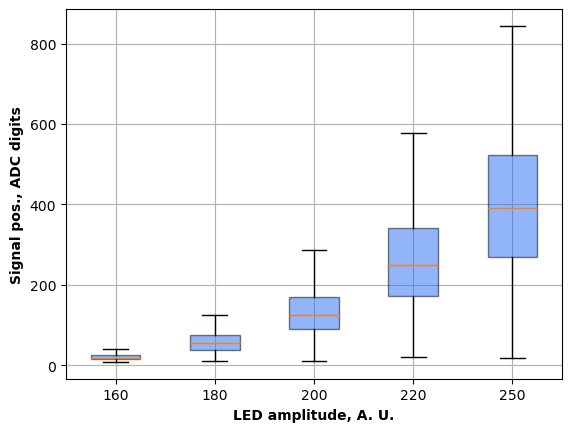

In [31]:
# plotting boxplots peak pos. in ADC vs LED amp.

data = []
for arg in df_led_pos.columns:
    data.append([x for x in df_led_pos[arg] if x > 0. and x < 1023. and pd.notna(x)])

led_boxes = plt.boxplot(data,
                        labels=df_led_pos.columns,
                        showfliers=False,
                        patch_artist=True,
                        boxprops={'facecolor': '#276CF5', 'alpha': 0.5}
                       )

plt.xlabel("LED amplitude, A. U.", fontweight="bold")
plt.ylabel("Signal pos., ADC digits", fontweight="bold")
# plt.autoscale('y')
plt.grid(True)
# plt.yscale("log")
plt.show()

### ADC vs LED boxplot + dots

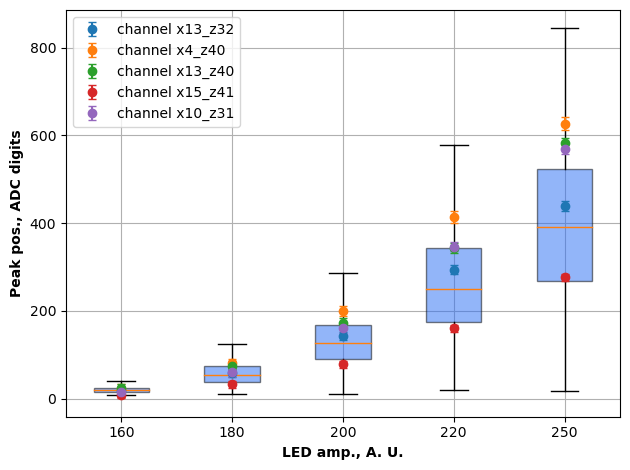

In [32]:
# plotting pos in ADC vs LED amp. for 5 random channels (with boxplots from a cell above)

mask = (df_led_pos > 0.)

df_led_pos_sample = df_led_pos[mask].dropna().sample(n=5, random_state=42)
df_led_rms_sample = df_led_rms.loc[df_led_pos_sample.index]

fig, ax = plt.subplots()

ax.boxplot(data, labels=df_led_pos.columns,
           showfliers=False, patch_artist=True,
           boxprops={'facecolor': '#276CF5', 'alpha': 0.5}
           )

# errorbars on same axes
for ich in df_led_pos_sample.index:
    y = df_led_pos_sample.loc[ich].values
    x = np.arange(len(y)) + 1
    yerr = 2.95 * df_led_rms_sample.loc[ich].values
    ax.errorbar(x, y, yerr=yerr, 
                fmt='o', 
                capsize=3,
                label=f"channel {ich}")

ax.set_xticks(np.arange(len(df_led_pos.columns)) + 1)
ax.set_xticklabels(df_led_pos.columns)
plt.xlabel("LED amp., A. U.", fontweight="bold")
plt.ylabel("Peak pos., ADC digits", fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.yscale("log")
plt.show()

### ADC vs LED hist + boxplot

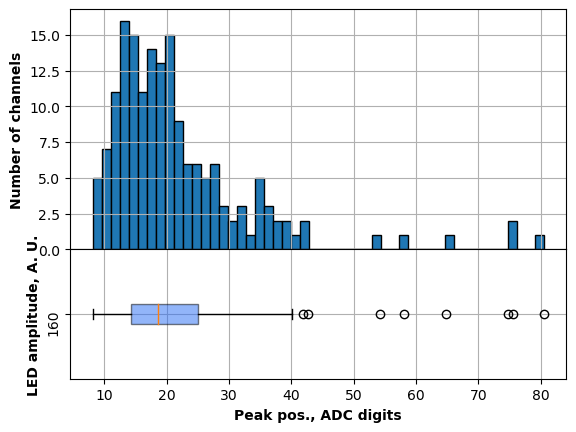

In [33]:
led = 160
data = [x for x in df_led_pos[led].to_list() if x > 0.]

fig, ax = plt.subplots(nrows=2, ncols=1, 
                       sharex=True,
                       height_ratios=[0.65, 0.35])

fig.subplots_adjust(hspace=0.)

ax[0].hist(data, bins=50,
         edgecolor="black")

ax[0].grid(True)
ax[0].set_xlabel("Peak pos., ADC digits", fontweight="bold")
ax[0].set_ylabel("Number of channels", fontweight="bold")

led_boxplot = ax[1].boxplot(data,
                            labels=[led],
                            showfliers=True,
                            patch_artist=True,
                            vert=False,
                            boxprops={'facecolor': '#276CF5', 'alpha': 0.5}
                            )
    

ax[1].grid(True)
ax[1].set_xlabel("Peak pos., ADC digits", fontweight="bold")
ax[1].set_ylabel("LED amplitude, A. U.", fontweight="bold")
ax[1].tick_params(axis="y", labelrotation=90)

plt.show()

### 2D Heatmap

[Text(0.5, 23.52222222222222, 'X channels'),
 Text(50.722222222222214, 0.5, 'Z channels'),
 Text(0.5, 1.0, 'Pedestals RMS for 180')]

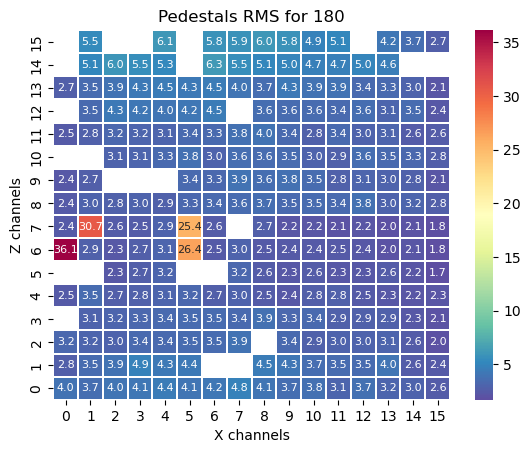

In [34]:
label = 180
grid = PHOSAnalyzer.df_to_grid(df_led_rms, label)

phos_heatmap = sns.heatmap(grid, 
                           mask=(grid<=0), 
                           cmap="Spectral_r", 
                           linewidths=0.01, 
                           annot=True, 
                           annot_kws={"fontsize": 8},
                           fmt=".1f"
                           )
phos_heatmap.invert_yaxis()
phos_heatmap.set(xlabel="X channels", ylabel="Z channels", title=f"Pedestals RMS for {label}")

### ADC RMS vs LED boxplot

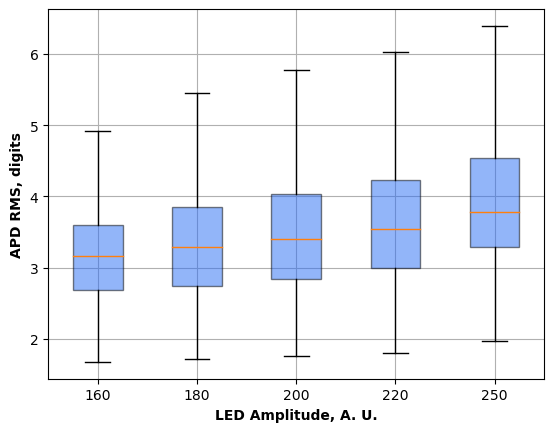

In [35]:
# plotting boxplots peak RMS in ADC vs LED amp.

data = []
for arg in df_led_rms.columns:
    data.append([x for x in df_led_rms[arg] if x > 0. and x < 1023. and pd.notna(x)])

led_boxes = plt.boxplot(data,
                        labels=df_led_rms.columns,
                        showfliers=False,
                        patch_artist=True,
                        boxprops={'facecolor': '#276CF5', 'alpha': 0.5})

plt.xlabel("LED Amplitude, A. U.", fontweight="bold")
plt.ylabel("APD RMS, digits", fontweight="bold")
plt.autoscale('y')
plt.grid(True)
plt.show()

## HV and Gain Calibration

### HV init cell

In [2]:
hv_array     = [210,300,350]
run_hv_array = [2408,2409,2407]

phos_hv_analysis = PHOSAnalyzer.PHOSAnalyzer(args_list=hv_array, run_list=run_hv_array)
phos_hv_analysis.set_base_path("/mnt/d/Projects/QML/PHOS256/data/")
phos_hv_analysis.fill_df_from_TH1(do_ped_sub=True, gain="HG")

df_hv_pos = phos_hv_analysis.get_df_pos()
df_hv_rms = phos_hv_analysis.get_df_rms()

df_hv_pos.to_csv("DF_HV_Calib_PeakPos_HG.csv", index_label="channels")
df_hv_rms.to_csv("DF_HV_Calib_PeakRMS_HG.csv", index_label="channels")

df_hv_pos

,210,300,350
x0_z30,399.482223,0.0,NaN
x0_z31,258.161211,776.667575,NaN
x0_z32,365.001411,0.0,0.0
x0_z33,71.284048,70.847541,67.885059
x0_z34,226.733469,633.091631,0.0
...,...,...,...
x15_z41,78.386005,276.235624,0.0
x15_z42,43.05032,130.121597,404.164737
x15_z43,155.778969,396.126659,0.0
x15_z44,0.0,30.131628,100.407976


### ADC vs HV boxplot

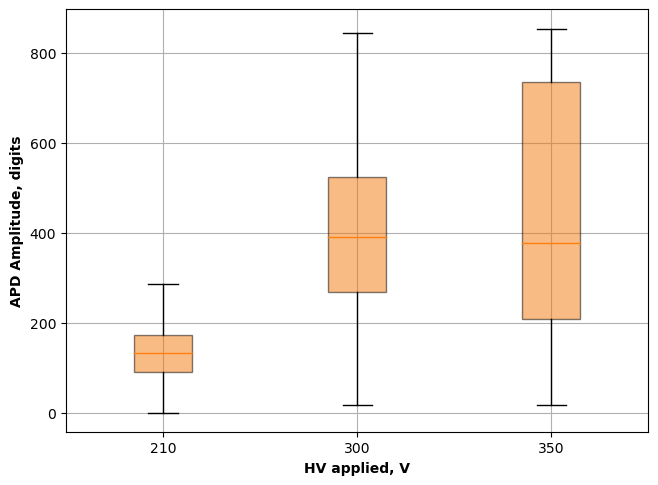

In [188]:
# plotting peak pos. in ADC vs HV

data = []
for arg in df_hv_pos.columns:
    data.append([x for x in df_hv_pos[arg] if x > 0. and x < 1023. and pd.notna(x)])

fig = plt.figure()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)

hv_boxes = plt.boxplot(data,
                       labels=df_hv_pos.columns,
                       showfliers=False,
                       patch_artist=True,
                       boxprops={'facecolor': '#F4780B', 'alpha': 0.5}
                      )

plt.xlabel("HV applied, V", fontweight="bold")
plt.ylabel("APD Amplitude, digits", fontweight="bold")
plt.autoscale('y')
plt.grid(True)

# plt.savefig(f"figures/20251216_Boxplot_PeakPos_vs_HV_LED250.png", dpi=500)
# plt.show()

### ADC vs HV hist + boxplot

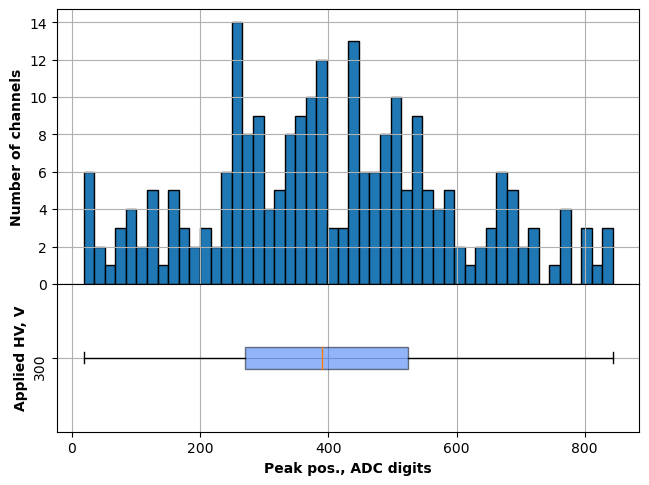

In [189]:
hv = 300
data = [x for x in df_hv_pos[hv].to_list() if x > 0.]

fig, ax = plt.subplots(nrows=2, ncols=1, 
                       sharex=True,
                       height_ratios=[0.65, 0.35])

fig.subplots_adjust(hspace=0., top=0.98, bottom=0.1, left=0.07, right=0.98)

ax[0].hist(data, bins=50,
         edgecolor="black")

ax[0].grid(True)
ax[0].set_xlabel("Peak pos., ADC digits", fontweight="bold")
ax[0].set_ylabel("Number of channels", fontweight="bold")

hv_boxplot = ax[1].boxplot(data,
                            labels=[hv],
                            showfliers=True,
                            patch_artist=True,
                            vert=False,
                            boxprops={'facecolor': '#276CF5', 'alpha': 0.5}
                            )
    

ax[1].grid(True)
ax[1].set_xlabel("Peak pos., ADC digits", fontweight="bold")
ax[1].set_ylabel("Applied HV, V", fontweight="bold")
ax[1].tick_params(axis="y", labelrotation=90)


# plt.savefig(f"figures/20251216_Hist_Boxplot_PeakPos_HV{hv}V_LED250.png", dpi=500)
# plt.show()

### ADC vs HV dots

In [191]:
Nchannels = 10
ref_hv = [0.] * Nchannels

In [105]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [122]:
# testing of channel-to-(fec,csp) mapping

count = 0
for channel in df_hv_pos.index:
    (fec, csp) = PHOSAnalyzer.get_fec_csp(channel)
    if fec != 0:
        continue
    # print(f"channel {channel}: FEC = {fec}, CSP = {csp}")
    count += 1

print(f"Channels in total: {count}")

calib_hv_per_csp = [np.zeros(32) for fec in range(0,8)]

Channels in total: 32


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Total channels: 42


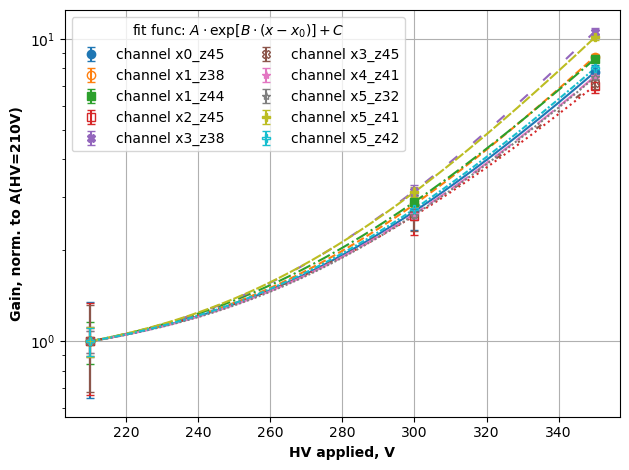

In [124]:
# plotting pos in ADC vs HV. for N random channels (with boxplots from a cell above)
# draft for the gain calibration

Nchannels = 10
isGain = True
target_gain = 6
tot_ch = 0

mask  = (df_hv_pos[210] > 0.)
mask &= (df_hv_pos[210] + 5 < df_hv_pos[300])
mask &= (df_hv_pos[300] + 5 < df_hv_pos[350])

# df_hv_pos_sample = df_hv_pos[mask].dropna().sample(n=Nchannels, random_state=42)
df_hv_pos_sample = df_hv_pos[mask].dropna()
df_hv_rms_sample = df_hv_rms.loc[df_hv_pos_sample.index]

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)
style_map = PHOSAnalyzer.get_style_map(n=Nchannels, gradient="tab10", vmin=0, vmax=1)

x = np.array(df_hv_pos_sample.columns)
xfit = np.linspace(x[0], x[-1], 1000)

x0 = x.mean()
def func(x, a, b, c):
    return a * np.exp(b * (x - x0)) + c
def get_gain(target_gain, a, b, c): #revers func to the fit func, not universal solution
    return np.log((target_gain - c) / a) / b + x0

for i, ich in enumerate(df_hv_pos_sample.index):

    y    = np.array(df_hv_pos_sample.loc[ich].values)
    yerr = np.array(df_hv_rms_sample.loc[ich].values)

    # setting Gain at 1 for the lowest HV (assuming Gain=1 at HV=50V, y[0])
    # if not measured at HV=50V, scale factor could be eval from func(HV=50V)
    if (isGain):
        yerr /= y[0]
        y /= y[0]
    
    p0 = [y.mean(), 0.1, 1]
    
    popt, pcov = curve_fit(func, x, y, 
                        #    sigma=2.95*yerr,
                        #    absolute_sigma=True,
                           p0=p0,
                           maxfev=1000,
                          )
    
    if (i < Nchannels): # drawning only Nchannels for presentation
        ax.errorbar(x, y, yerr=2.95*yerr, 
                    **style_map["markers"][i],
                    linestyle="none",
                    capsize=3,
                    color=style_map["colors"][i],
                    label=f"channel {ich}"
                   )

        plt.plot(xfit, func(xfit, *popt), 
                 linestyle=style_map["linestyles"][i],
                 color=style_map["colors"][i]
                )
    
    # if not measured at HV=50V, scale factor could be eval from func(HV=50V)
    if (not isGain):
        ref_hv[i] = func(50, *popt)

    if (isGain):
        tot_ch += 1
        (fec, csp) = PHOSAnalyzer.get_fec_csp(ich)
        target_hv = get_gain(target_gain, *popt)
        calib_hv_per_csp[fec][csp] = int(target_hv)
        # print(f"FEC = {fec:2d}, CSP = {csp:2d}: HV = {target_hv:.0f} V (for gain = {target_gain})")

print(f"Total channels: {tot_ch}")

plt.xlabel("HV applied, V", fontweight="bold")
plt.ylabel("Peak position, ADC digits", fontweight="bold")
if (isGain):
    plt.ylabel("Gain, norm. to A(HV=210V)", fontweight="bold")

plt.grid(True)
plt.legend(title=r"fit func: $A\cdot\exp[B\cdot(x - x_0)] + C$", ncol=2)
plt.yscale("log")
plt.tight_layout()

# plt.savefig(f"figures/20251218_Gain_vs_HV_LED250_HG.png", dpi=500)

FEC01:
FEC02:
	CSP =  5: HV = 340 V (for gain = 6)
	CSP = 25: HV = 343 V (for gain = 6)
FEC03:
FEC04:
	CSP = 11: HV = 339 V (for gain = 6)
	CSP = 12: HV = 333 V (for gain = 6)
	CSP = 30: HV = 336 V (for gain = 6)
FEC05:
	CSP =  1: HV = 334 V (for gain = 6)
	CSP =  3: HV = 327 V (for gain = 6)
	CSP =  6: HV = 327 V (for gain = 6)
	CSP =  7: HV = 339 V (for gain = 6)
	CSP = 15: HV = 337 V (for gain = 6)
	CSP = 23: HV = 325 V (for gain = 6)
	CSP = 27: HV = 315 V (for gain = 6)
FEC06:
	CSP =  8: HV = 322 V (for gain = 6)
	CSP = 20: HV = 340 V (for gain = 6)
	CSP = 21: HV = 329 V (for gain = 6)
	CSP = 26: HV = 342 V (for gain = 6)
	CSP = 28: HV = 335 V (for gain = 6)
FEC07:
	CSP =  5: HV = 337 V (for gain = 6)
	CSP =  9: HV = 335 V (for gain = 6)
	CSP = 25: HV = 335 V (for gain = 6)
	CSP = 26: HV = 334 V (for gain = 6)
	CSP = 27: HV = 335 V (for gain = 6)
	CSP = 28: HV = 341 V (for gain = 6)
	CSP = 30: HV = 329 V (for gain = 6)
	CSP = 31: HV = 331 V (for gain = 6)
FEC08:
	CSP =  1: HV = 334

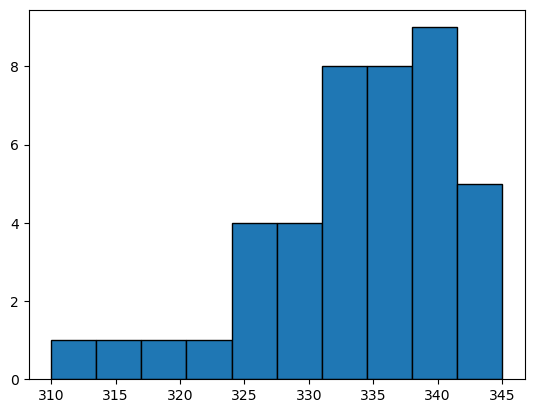

In [ ]:
data_tmp = []

for ifec, fec in enumerate(calib_hv_per_csp):
    print(f"FEC{ifec+1:02d}:")
    for icsp, hv in enumerate(fec):
        if (hv != 0):
            print(f"\tCSP = {icsp:2d}: HV = {hv:.0f} V (for gain = {target_gain})")
            data_tmp.append(int(hv))

counts, bin_edges, patches = plt.hist(data_tmp, bins=max(data_tmp) - min(data_tmp), edgecolor='black')

# plt.xticks(range(4,32,2))

# print(f"FEC = {fec:2d}, CSP = {csp:2d}: HV = {gain:.0f} V (for gain = {target_gain})")

### 2D Heatmap

[Text(0.5, 4.322222222222253, 'X channels'),
 Text(15.522222222222227, 0.5, 'Z channels'),
 Text(0.5, 1.0, 'Pedestals pos. for HV=350V')]

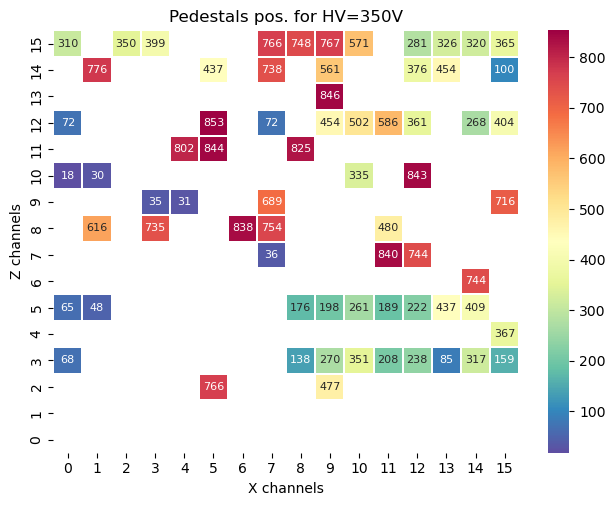

In [193]:
label = 350
grid = PHOSAnalyzer.df_to_grid(df_hv_pos, label)

fig = plt.figure()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)

phos_heatmap = sns.heatmap(grid, 
                           mask=(grid<=0), 
                           cmap="Spectral_r", 
                           linewidths=0.01, 
                           annot=True, 
                           annot_kws={"fontsize": 8},
                           fmt=".0f"
                           )

phos_heatmap.invert_yaxis()
phos_heatmap.set(xlabel="X channels", ylabel="Z channels", title=f"Pedestals pos. for HV={label}V")


# plt.savefig(f"figures/20251216_Heatmap_PeakPos_HV{label}V_LED250.png", dpi=500)

### Init cell. ADC vs HV for LG

In [194]:
hv_array     = [210,300,350]
run_hv_array = [2408,2409,2407]

phos_hv_lg_analysis = PHOSAnalyzer.PHOSAnalyzer(args_list=hv_array, run_list=run_hv_array)
phos_hv_lg_analysis.fill_df_from_TH1(do_ped_sub=True, gain="LG")

df_hv_lg_pos = phos_hv_lg_analysis.get_df_pos()
df_hv_lg_rms = phos_hv_lg_analysis.get_df_rms()

df_hv_lg_pos.to_csv("DF_HV_Calib_PeakPos_LG.csv")
df_hv_lg_rms.to_csv("DF_HV_Calib_PeakRMS_LG.csv")

df_hv_lg_pos

,210,300,350
x0_z30,22.749248,79.516312,NaN
x0_z31,14.152871,26.434861,NaN
x0_z32,20.853461,53.079014,539.523205
x0_z33,0.0,0.0,0.0
x0_z34,13.027774,36.901805,109.538368
...,...,...,...
x15_z41,0.0,15.522925,59.383396
x15_z42,0.0,0.0,23.127353
x15_z43,9.148326,23.39982,64.421692
x15_z44,0.0,0.0,0.0


### ACD vs HV for LG dots

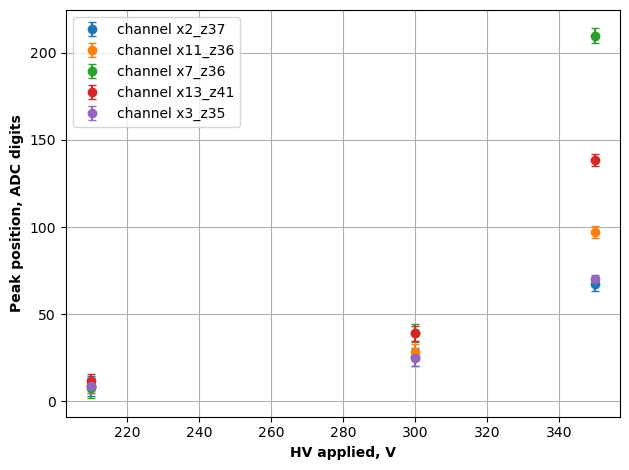

In [195]:
# plotting pos in ADC vs HV. for 5 random channels (with boxplots from a cell above)
# draft for the gain calibration

# mask = (df_hv_pos > 0.)
mask = (df_hv_lg_pos[210] > 0.) & (df_hv_lg_pos[210] < df_hv_lg_pos[300]) & (df_hv_lg_pos[300] < df_hv_lg_pos[350])

df_hv_lg_pos_sample = df_hv_lg_pos[mask].dropna().sample(n=5, random_state=42)
df_hv_lg_rms_sample = df_hv_lg_rms.loc[df_hv_lg_pos_sample.index]

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)

x = df_hv_lg_pos_sample.columns

for ich in df_hv_lg_pos_sample.index:
    y = df_hv_lg_pos_sample.loc[ich].values
    yerr = 2.95 * df_hv_lg_rms_sample.loc[ich].values
    # setting Gain at 1 for the lowest HV (for Gain=1 HV=30V)
    # yerr /= y[0]
    # y /= y[0]
    ax.errorbar(x, y, yerr=yerr, 
                fmt='o', 
                capsize=3,
                label=f"channel {ich}")


plt.xlabel("HV applied, V", fontweight="bold")
# plt.ylabel("Gain, norm. to A(HV=210V)", fontweight="bold")
plt.ylabel("Peak position, ADC digits", fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig(f"figures/20251216_Gain_vs_HV_LED250_LG.png", dpi=500)
# plt.show()

### Gain HG/LG

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


18.225115281377125


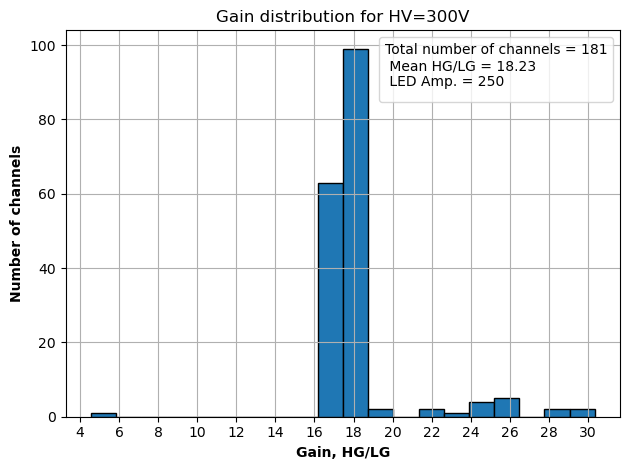

In [196]:
hv = 300

lg_sample = df_hv_lg_pos[df_hv_lg_pos[hv] > 0.].dropna()
hg_sample = df_hv_pos[df_hv_pos[hv] > 0.].dropna()

common_idx = lg_sample.index.intersection(hg_sample.index)

# filter both df
lg_filtered_sample = lg_sample.loc[common_idx]
hg_filtered_sample = hg_sample.loc[common_idx]

gains = np.array([x/y for x, y in zip(hg_filtered_sample[hv].to_list(), 
                                          lg_filtered_sample[hv].to_list())])

print(gains.mean())

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)

counts, bin_edges, patches = plt.hist(gains, bins=20, edgecolor='black')
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.xticks(range(4,32,2))
plt.title(f"Gain distribution for HV={hv}V")
plt.xlabel("Gain, HG/LG", fontweight="bold")
plt.ylabel("Number of channels", fontweight="bold")
plt.grid(True)
plt.tight_layout()

plt.legend(title=f"Total number of channels = {len(gains)}\n Mean HG/LG = {gains.mean():.2f}\n LED Amp. = 250", 
           loc="best")

plt.savefig(f"figures/20251216_HG2LG_vs_HV300_LED250.png", dpi=500)